# Predicting NBA Salaries

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [228]:
# Importing cleaned data set
joined = pd.read_csv("joined.csv")

## Exploratory Data Analysis


In [229]:
avg_league_stats = joined.groupby("season")[['ppg', 'ast_pg', 'blk_pg', 'tov_pg', 'stl_pg', 'reb_pg'
                                                 ]].mean().reset_index()
avg_league_stats.head()

,season,ppg,ast_pg,blk_pg,tov_pg,stl_pg,reb_pg
0,2002-2003,9.329524,2.101672,0.538800,1.383440,0.774801,4.318896
1,2003-2004,10.242602,2.270055,0.586693,1.516367,0.834362,4.645690
2,2004-2005,10.007142,1.923317,0.632536,1.389725,0.700791,4.628989
3,2005-2006,8.875441,1.892617,0.460543,1.291894,0.661994,3.814198
4,2006-2007,8.968913,1.899312,0.437860,1.351316,0.646911,3.841353


#### How have certain NBA statistics changed over the years?

Text(0.5, 1.0, 'Evolution of Other Major Statistics')

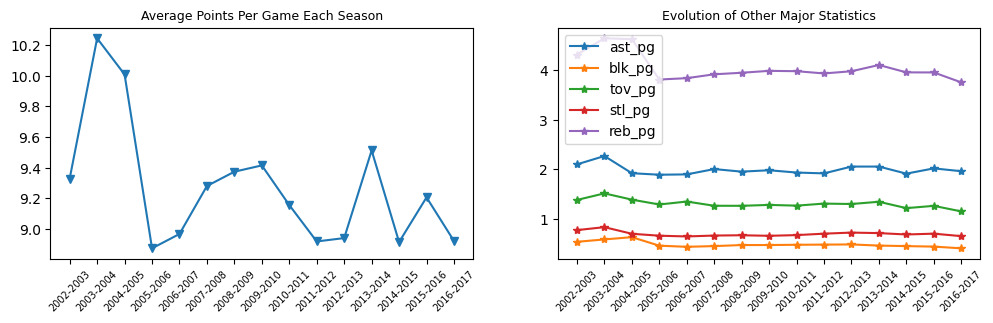

In [230]:
# Evolution of ppg
fig, axs = plt.subplots(1,2, figsize = [12,3])

axs[0].plot(avg_league_stats["season"], avg_league_stats["ppg"], marker = "v")
axs[0].xaxis.set_ticks(avg_league_stats["season"]) # In order to avoid warning
axs[0].set_xticklabels(labels = avg_league_stats["season"], rotation = 45, size = 7)
axs[0].set_title("Average Points Per Game Each Season", size = 9)

# Evolution of other statistics
stats = ['ast_pg', 'blk_pg', 'tov_pg', 'stl_pg', 'reb_pg']
for statistic in stats:
    axs[1].plot(avg_league_stats["season"], avg_league_stats[statistic], marker = "*")
    axs[1].xaxis.set_ticks(avg_league_stats["season"])
    axs[1].set_xticklabels(labels = avg_league_stats["season"], rotation = 45, size = 7)
    
plt.legend(stats, loc = "upper left")
axs[1].set_title("Evolution of Other Major Statistics", size = 9)

Points per game dropped significantly from the 2004-2005 season to the 2005-2006 season, and seem the fluctuate from the 2006-2007 season to the 2016-2017 season. Blocks and steals per game gave remained pretty consistent throughout the years. Rebounds, assists, and turnovers are on a slow decrease.

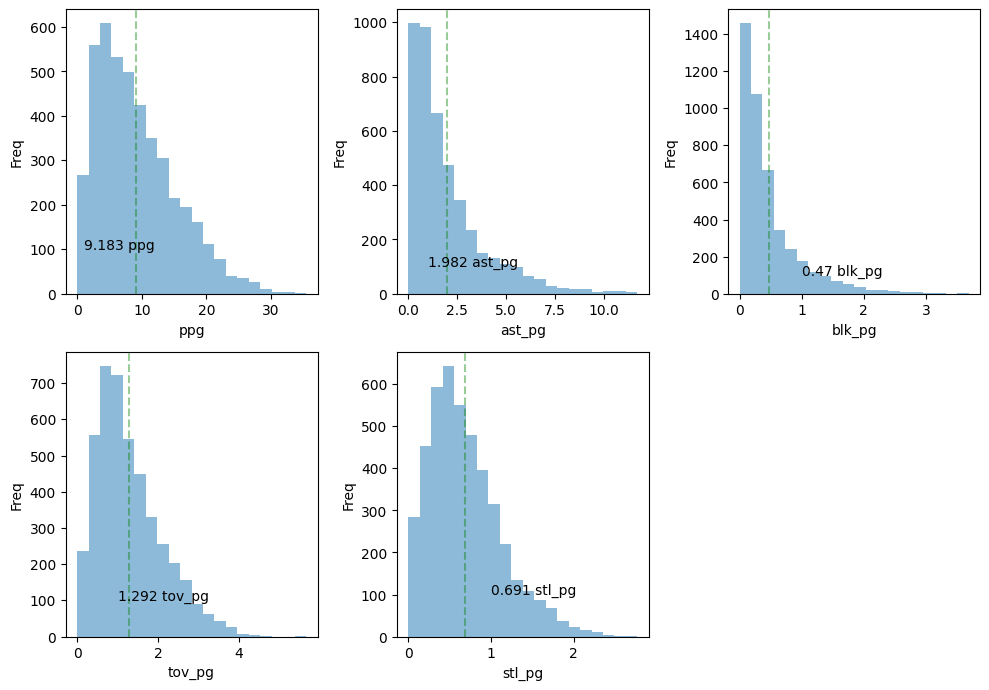

In [231]:
# Distributions of major statistics
fig = plt.figure(figsize = [10, 10])
stats = ['ppg', 'ast_pg', 'blk_pg', 'tov_pg', 'stl_pg', 'reb_pg']
k = 0

for i in range(1,6):
    fig.add_subplot(3,3,i)
    plt.hist(joined[stats[k]], alpha = 0.5, bins = 20)
    plt.axvline(joined[stats[k]].mean(), linestyle = "dashed", alpha = 0.4, color = "green")
    plt.text(1,100, str(round(joined[stats[k]].mean(), 3)) + " " + stats[k])
    plt.ylabel("Freq")
    plt.xlabel(stats[k])
    k += 1
    
plt.tight_layout()

From this data, the typical NBA player averaged about 9 points, 2 assists, 0.5 blocks, 1 turnover, and 0.7 steals per game. All of the distributions here are extremely right skewed, which makes sense when you consider the level of NBA players in the league. Many players tend to perform anywhere between a below-average to elite level standard. However, there are a select few players who can perform at a All-Star/Super Star level, leading to outliers that tend towards the right of each distribution.

#### Proportions of Players in Certain Positions

Text(0.5, 1.0, 'Percentage of Players in Each Position')

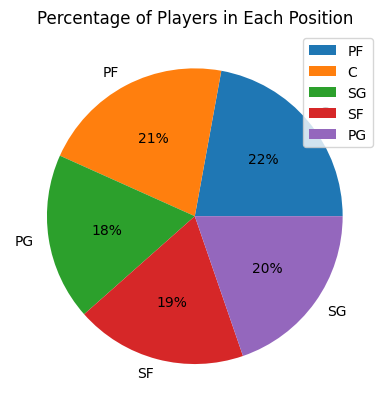

In [232]:
pos_count = joined.groupby("Pos")["Player"].count().reset_index()
plt.pie(pos_count["Player"], autopct='%1.0f%%', labels = pos_count["Pos"])
plt.legend(["PF", "C", "SG", "SF", "PG"], loc = "upper right") 
plt.title("Percentage of Players in Each Position")

#### What did each position's game statistics look like?

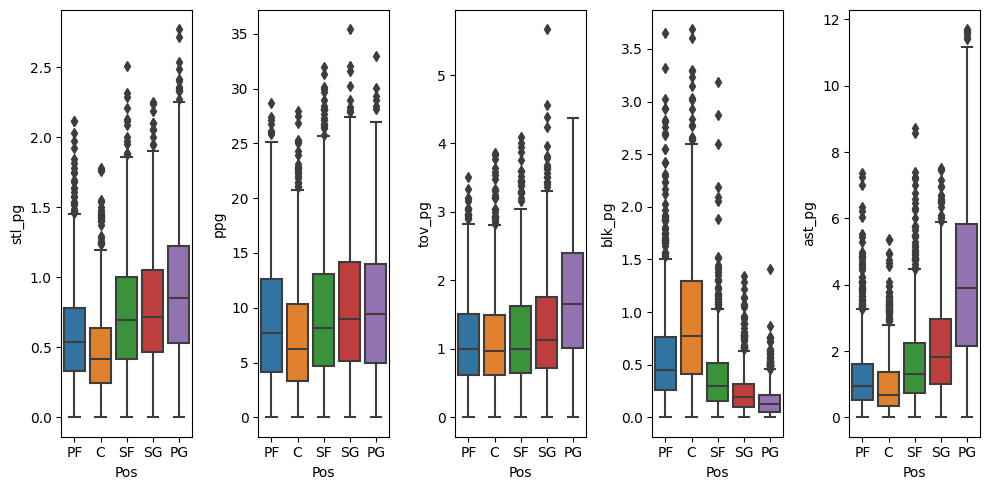

In [233]:
fig, axs = plt.subplots(1,5, figsize = [10,5])

sns.boxplot(ax = axs[0], x = joined["Pos"], y = joined["stl_pg"])
sns.boxplot(ax = axs[1], x = joined["Pos"], y = joined["ppg"])
sns.boxplot(ax = axs[2], x = joined["Pos"], y = joined["tov_pg"])
sns.boxplot(ax = axs[3], x = joined["Pos"], y = joined["blk_pg"])
sns.boxplot(ax = axs[4], x = joined["Pos"], y = joined["ast_pg"])

plt.tight_layout()

Point guards averaged the most turnovers, steals, assists, and points per game. Unsuprisingly, centers averaged the most blocks per game. For all statistics, there are a fair share of outliers that are likely All-Star level players in the league (many of which are point guards).

In [234]:
stats = ["ppg", "stl_pg", "tov_pg"]

for stat in stats:
    print(joined[joined.Pos == "PG"][["season", "Player", stat]].sort_values(by = stat, ascending = False).head(6))
    print("\n")

         season             Player        ppg
761   2005-2006      Allen Iverson  33.013889
3787  2015-2016      Stephen Curry  30.063291
648   2005-2006     Gilbert Arenas  29.325000
4139  2016-2017      Isaiah Thomas  28.934211
997   2006-2007     Gilbert Arenas  28.445946
3529  2014-2015  Russell Westbrook  28.149254


         season       Player    stl_pg
1616  2008-2009   Chris Paul  2.769231
1399  2007-2008   Chris Paul  2.712500
2577  2011-2012   Chris Paul  2.533333
3409  2013-2014   Chris Paul  2.483871
3094  2012-2013   Chris Paul  2.414286
2983  2012-2013  Ricky Rubio  2.403509


         season             Player    tov_pg
3529  2014-2015  Russell Westbrook  4.373134
3911  2015-2016  Russell Westbrook  4.275000
4200  2016-2017          John Wall  4.141026
3920  2015-2016          John Wall  4.129870
2769  2011-2012     Deron Williams  3.981818
2980  2012-2013        Rajon Rondo  3.894737




#### How have NBA player's salaries changed?

Text(1, 100, '5.005 million')

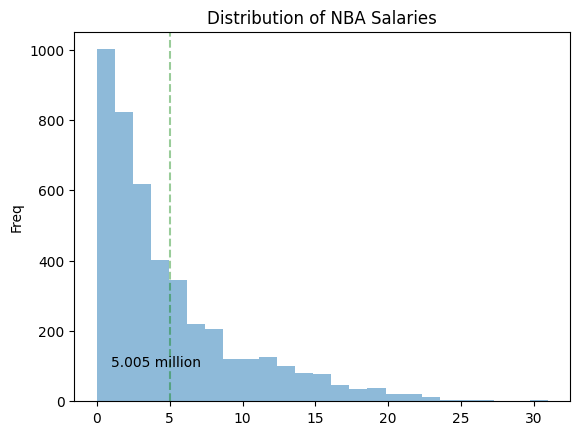

In [235]:
plt.hist(joined["salary"], alpha = 0.5, bins = 25)
plt.ylabel("Freq")
plt.title("Distribution of NBA Salaries")
plt.axvline(joined["salary"].mean(), linestyle = "dashed", alpha = 0.4, color = "green")
plt.text(1,100, str(round(joined["salary"].mean(), 3)) + " million")

The tpyical NBA player would make around 5 million dollars a year. Similar to the distribution of game statistics, salaries are also extremely right skewed, likely for a similar reason in that there are very few players who can perform at an All-Star/Super star level, and thus, very few players who will get paid an exceptional salary.

Text(0.5, 1.0, 'Average League Salary Over Time')

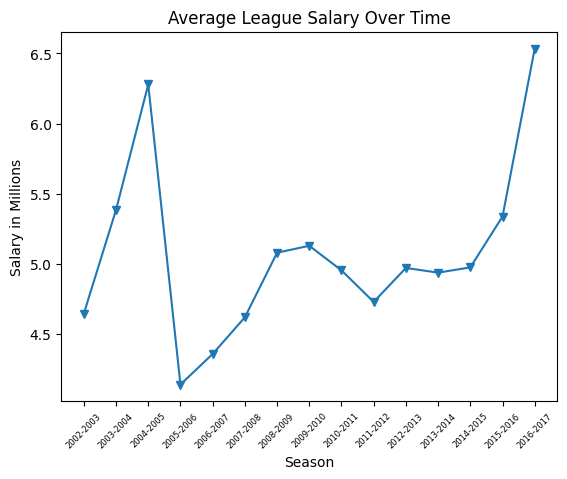

In [236]:
# Average Salary over each season
avg_league_sal = joined.groupby("season")['salary'].mean().reset_index()

plt.plot(avg_league_sal["season"], avg_league_sal["salary"], marker = "v")
plt.xticks(fontsize = 6, rotation = 45)
plt.xlabel("Season")
plt.ylabel("Salary in Millions")
plt.title("Average League Salary Over Time")

There is a sharp decline in the average NBA player's salary from the 2004-2005 season to the 2005-2006 season. Interestingly, this sharp decline in salary occurs during the same time frame that average points per game also declined sharply. From then on, salary seems to be increasing steadily.

In [237]:
# Top 5 highest paid players each season
def getTopSal(season):
    t5sal = joined.sort_values(by = ["season", "salary"], ascending = 
                   [False, False]).groupby("season")[["season", "Player", "salary"]].head(7)
    
    return t5sal[t5sal["season"] == season] # season input must be a str

In [238]:
seasons = pd.unique(joined.season)
for s in seasons:
    print(getTopSal(s))
    print("\n")

        season            Player  salary
219  2002-2003     Kevin Garnett  25.200
50   2002-2003  Shaquille O'Neal  23.571
208  2002-2003        Shawn Kemp  21.500
211  2002-2003      Juwan Howard  20.625
5    2002-2003    Scottie Pippen  19.727
75   2002-2003       Karl Malone  19.250
99   2002-2003   Rasheed Wallace  16.200


        season            Player  salary
372  2003-2004     Kevin Garnett  28.000
268  2003-2004  Shaquille O'Neal  26.571
270  2003-2004   Dikembe Mutombo  17.895
285  2003-2004      Chris Webber  15.937
379  2003-2004     Allan Houston  15.937
258  2003-2004  Damon Stoudamire  14.625
261  2003-2004  Latrell Sprewell  13.500


        season            Player  salary
402  2004-2005  Shaquille O'Neal  29.464
453  2004-2005   Dikembe Mutombo  19.684
464  2004-2005     Allan Houston  17.531
384  2004-2005  Damon Stoudamire  15.750
389  2004-2005  Latrell Sprewell  14.625
440  2004-2005         Ray Allen  14.625
458  2004-2005   Stephon Marbury  14.625


        se

Kevin Garnett is consistently one of the top highest paid players throughout each season. Starting from the 2009-2010 season, Kobe Bryant became the league's most paid player. In the 2016-2017 season, LeBron James took that title as Kobe Bryant had retired in after the 2015-2016 season.

<Axes: ylabel='season'>

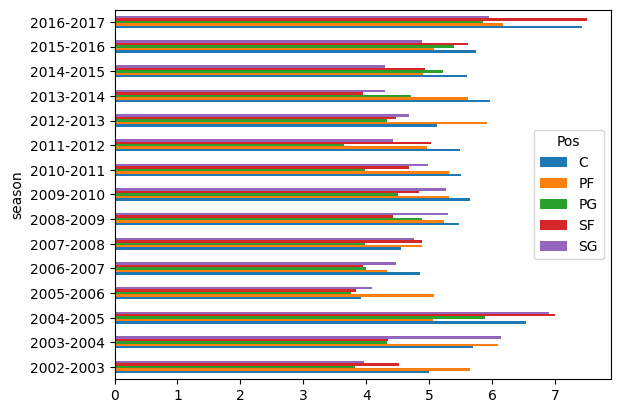

In [239]:
# What position(s) get paid the most
sal_by_pos = joined.groupby(["Pos", "season"])["salary"].mean().unstack(level = "Pos")
sal_by_pos.plot(kind = "barh")

For most seasons, centers were on average paid the most compared to the other positions. They were on average paid the most for 8 out of the 15 recorded seasons.

#### Correlation between independent variables

<Axes: >

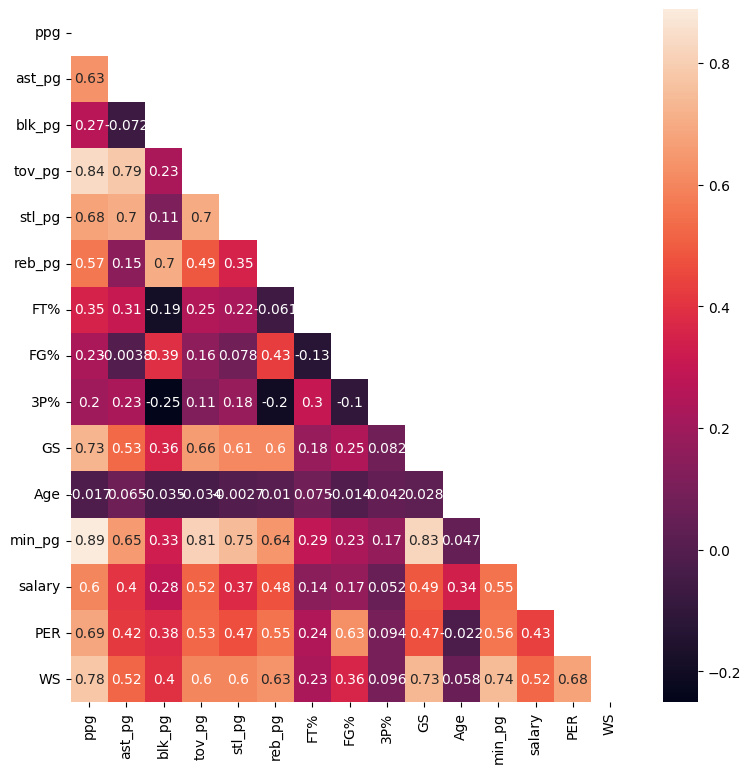

In [240]:
# Correlation heatmap
axs, fig = plt.subplots(figsize = [9,9])
features = joined[['ppg', 'ast_pg', 'blk_pg', 'tov_pg', 'stl_pg', 'reb_pg', 'FT%',
                       'FG%', '3P%', 'GS', "Age", "min_pg", "salary", 'PER', 'WS']]
correlation = features.corr()
sns.heatmap(correlation, 
           mask = np.triu(np.ones_like(correlation, dtype=bool)),
           annot = True)

Note that some of the variables here have very high colinearity (for example minutes per game and points per game). We need to take this into account when choosing what features to use for our regression model. Using features that are extremely colinear make it difficult to separate the effect of each feature on the model's output (ie if minutes per game increases, so will points per game, so it's difficult to determine how much impact either feature has on salaries separately). Colinearity as well as multicolinearity also increase the variance of a linear model's regression coefficients ( $ \beta_i $ )

In [241]:
# One hot encoding position of players
joined["is_center"] = np.where(joined["Pos"] == "C", 1, 0)
joined["is_sg"] = np.where(joined["Pos"] == "SG", 1, 0)
joined["is_pg"] = np.where(joined["Pos"] == "PG", 1, 0)
joined["is_pf"] = np.where(joined["Pos"] == "PF", 1, 0)
joined["is_sf"] = np.where(joined["Pos"] == "SF", 1, 0)

In [308]:
# Further data cleaning:
joined.drop(joined.columns[0], axis = 1, inplace = True)
joined.head(4)

,Player,Pos,Age,team,PTS,AST,BLK,TOV,STL,ORB,...,min_pg,FG%,FT%,3P%,salary,is_center,is_sg,is_pg,is_pf,is_sf
0,Zach Randolph,PF,21.0,POR,650.0,41.0,14.0,62.0,42.0,139.0,...,16.896104,0.512621,0.757764,0.000000,1.096,0,0,0,1,0
1,Vladimir Radmanovic,PF,22.0,SEA,724.0,97.0,22.0,100.0,64.0,76.0,...,26.527778,0.410180,0.705882,0.354949,1.561,0,0,0,1,0
2,Joel Przybilla,C,23.0,MIL,48.0,12.0,45.0,19.0,10.0,48.0,...,17.062500,0.391304,0.500000,NaN,1.862,1,0,0,0,0
3,Vitaly Potapenko,C,27.0,SEA,104.0,4.0,8.0,25.0,9.0,25.0,...,15.500000,0.440860,0.758621,NaN,5.238,1,0,0,0,0


## Training Models

In [272]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

In [263]:
# Removing rows with NA is FG% column
# Note: regression won't work normally if NAs are present
joined = joined[joined['FG%'].notna()]

In [274]:
# Selecting features
x = joined[['WS', 'GS', 'Age', 'ppg', 'ast_pg', 'reb_pg', 'stl_pg', 'blk_pg', 'FG%', 
            'is_center', 'is_pg', 'is_sg', 'is_pf', 'is_sf']]
y = joined['salary']

# Normalising numerical features
scaler = StandardScaler()
x.iloc[:, 0:9] = scaler.fit_transform(x.iloc[:, 0:9])

(4425, 14)

In [265]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                test_size=0.3, random_state = 1)

In [266]:
def getRegAccuracy(model, xtrain, ytrain, xtest, ytest):
    
    modelType = model.fit(xtrain, ytrain)
    ypred = modelType.predict(xtest)
    
    Y_test = ytest.to_numpy() # convert from series to np array
    Y_pred = ypred
    compare = pd.DataFrame({"y_test": Y_test, "y_predict": Y_pred}, columns= ["y_test", "y_predict"])
    compare["residual"] = compare["y_test"] - compare["y_predict"]
    
    # Obtaining metrics for accuracy
    r2 = r2_score(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    mae = median_absolute_error(ytest, ypred)
    
    # Plotting Residuals
    plt.figure(figsize = [5,3])
    plt.title("Residual Plot")
    sns.regplot(x = compare["y_predict"], y = compare["residual"], lowess=True, line_kws=dict(color="r"))
    #plt.scatter(compare["y_predict"], compare["residual"], color = "red")
    plt.ylabel("Residuals")
    plt.xlabel("Predicted Values")
   
    
    print(f"MSE: {mse} R^2: {r2} MAE: {mae}")
    return compare.head(10)

MSE: 11.220478066266589 R^2: 0.5243993133345104 MAE: 1.963139792091039
MSE: 11.220437565059424 R^2: 0.5244010300529804 MAE: 1.9629901727429384
MSE: 11.509603249487238 R^2: 0.5121442084396991 MAE: 1.9210036329121691
MSE: 9.123635710305548 R^2: 0.6132778493857086 MAE: 1.5141430999999996


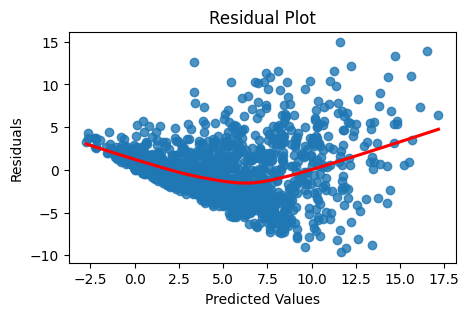

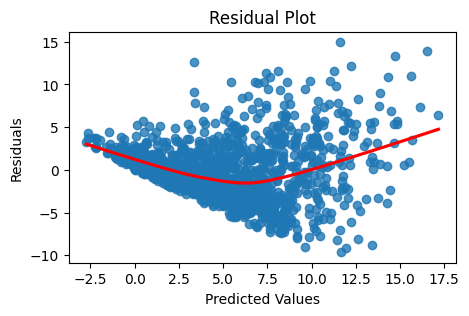

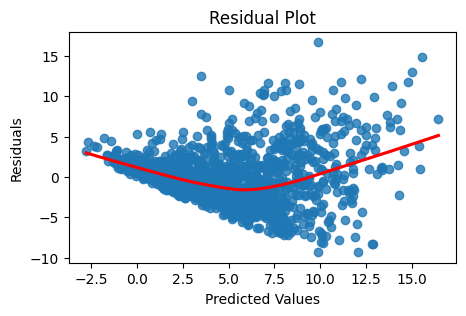

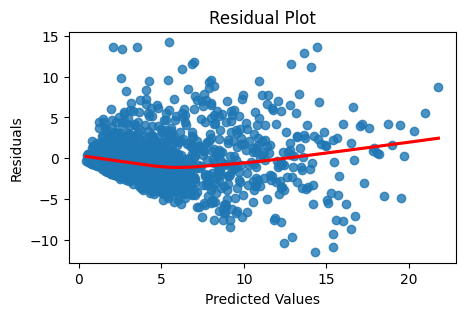

In [275]:
model1 = LinearRegression()
model2 = Ridge(alpha=0.1)
model3 = Lasso(alpha = 0.1)
model4 = RandomForestRegressor(n_estimators=100, random_state=1, oob_score=False)
model_list = [model1, model2, model3, model4]

for model in model_list:
    getRegAccuracy(model, x_train, y_train, x_test, y_test)

We see that the three linear regression variants all obtain a MSE of a round 11 and a $ r^2 $ of around 0.52. The MSE tells us how much our model is affected by the variance and bias. The higher the MSE, the weaker the model is. The $ r^2 $ tells us that roughly 52% of the variation in salary is explained by our linear model. 

We also note that the residual plots for these models show a slight parabolic pattern between the predicted values (salaries) and residuals (true salary - predicted salary). This implies that a linear model may not be a good fit for our data as the variance of the error terms in our model may not be constant, ie, $ Var ( \varepsilon_i ) \neq \sigma^2 $.

The Random Forest Regressor performs noticeably better than the previous models. This is because random forests are generally more powerful in handling non-linear patterns as well as colinearlity in features. Random forests are an "ensemble" method based off of decision trees, which divide the prediction space into multiple non-overlapping regions and makes predictions based off if an observation falls within that region (hence acting as a sequence of multiple "if else" conditions). This procedure allows for the model to handle both linear and non-linear data since the model doesn't assume any patterns in the data when assigning which region an observation falls into.

Random Forests also generate multiple bootstrapped samples from our training data. For each tree in each bootstrapped sample, each time a "split" is made the algorithm picks $ m $ predictors (rather than our full $ p $ predictors, $ m $ < $ p $) for the trees to use for their splits. This means that features that are strongly colinear or a single feature that is a super strong predictor will not affect the entire tree, giving the other predictors a chance to influence the model.

In [310]:
# Model selection with CV
scoring = ['r2', 'neg_mean_squared_error', 'neg_median_absolute_error']


for model in model_list:
    cv_result = cross_validate(model, x,y,cv = 5, scoring = scoring)

    time_cv = cv_result['fit_time']
    r2_cv = cv_result['test_r2']
    mse_cv = -1 * cv_result['test_neg_mean_squared_error']
    mae_cv = -1 * cv_result['test_neg_median_absolute_error']

    result_matrix = np.vstack((time_cv, r2_cv, mse_cv, mae_cv)) 
    result_matrix = result_matrix.transpose()

    result_df = pd.DataFrame(result_matrix, columns= ["time", "r2", "mse", "mae"])
    print(result_df ,"\n")

       time        r2        mse       mae
0  0.003817  0.409630  11.008604  1.962706
1  0.021712  0.543075   9.712057  1.771552
2  0.011707  0.566478   9.874232  1.814260
3  0.011084  0.545042  11.657400  1.891813
4  0.038901  0.462690  18.236479  2.248262 

       time        r2        mse       mae
0  0.004555  0.409635  11.008515  1.962367
1  0.001712  0.543082   9.711901  1.772062
2  0.012495  0.566481   9.874177  1.814552
3  0.007659  0.545039  11.657464  1.891598
4  0.012729  0.462686  18.236629  2.248168 

       time        r2        mse       mae
0  0.071717  0.408573  11.028310  1.961856
1  0.088844  0.544494   9.681877  1.761820
2  0.048513  0.559249  10.038900  1.858397
3  0.041448  0.522730  12.229091  1.980367
4  0.042148  0.448712  18.710923  2.140533 

       time        r2        mse       mae
0  1.709571  0.402383  11.143737  1.607284
1  1.560095  0.622651   8.020639  1.320319
2  1.586073  0.655581   7.844769  1.341010
3  1.552660  0.635457   9.340683  1.518953
4  1.

K-fold cross validation is used to assess the stability of each model's performance. We can see that each linear regressionmodel is for the most part stable, while the random forest has times where it's $ r^2 $ drops very low.

## Feature Importance

In [252]:
import dalex as dx
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [253]:
# Building a ML Pipeline
nba_rf = Pipeline(steps=[('rf',RandomForestRegressor(n_estimators=100, random_state=1, oob_score=False))])
nba_rf.fit(x_train, y_train)

Pipeline(steps=[('rf', RandomForestRegressor(random_state=1))])

In [254]:
# Performance of model on training data
nba_rf_exp = dx.Explainer(nba_rf, x_train, y_train)
nba_rf_exp.model_performance()

Preparation of a new explainer is initiated

  -> data              : 3097 rows 14 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3097 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x15f5970a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.185, mean = 5.11, max = 26.9
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.82, mean = -0.0312, max = 7.43
  -> model_info        : package sklearn

A new explainer has been created!


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



,mse,rmse,r2,mae,mad
RandomForestRegressor,1.434207,1.197584,0.942671,0.824909,0.546374


The MSE and $ r^2 $ are 1.4 and 0.94 respectively. This indicates that when the model is applied to our training data, roughly 94% of the variation in salary is explained by the model, and the model is able to predict these values with relatively low bias and variance.

In [255]:
# Performance of model on test data
nba_rf_exp = dx.Explainer(nba_rf, x_test, y_test)
nba_rf_exp.model_performance()

Preparation of a new explainer is initiated

  -> data              : 1328 rows 14 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1328 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x15f5970a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.44, mean = 4.99, max = 21.8
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -11.5, mean = -0.142, max = 14.2
  -> model_info        : package sklearn

A new explainer has been created!


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



,mse,rmse,r2,mae,mad
RandomForestRegressor,9.123636,3.020536,0.613278,2.128177,1.514143


Note that the $ r^2 $ and MSE are roughly the same as the one computed using getRegAccuracy

In [256]:
# Variable importance model
nba_rf_exp.model_parts(B = 10).plot()

The purpose of variable importance is to assess the effect of particular features on a model's output. For example, how much does points per game contribute to a player's salary? What about assists per game? The idea behind variable importance is to see how much a model's performance changes if a certain feature is altered or removed. Here, model_parts uses 10 pertubations to permute the values of our features and assess how much our model's perfomance worsens. The larger the change, the more important that particular feature is in our model. The horizontal axis (drop out loss) shows this by quantifying the loss of our model when a permuted feature is used against the loss of our model against the original values of the features.

From here, we can see that points per game and age were the largest contributors to the random forest model for predicting salaries of NBA players.